[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb)

### SadTalker：Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io) | [Github](https://github.com/Winfredy/SadTalker)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio


Installation (around 5 mins)

In [ ]:
### make sure that CUDA is available in Edit -> Nootbook settings -> GPU
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 15101 MiB


In [ ]:
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 2
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.9 1
!sudo apt install python3.8

!sudo apt-get install python3.8-distutils

!python --version

!apt-get update

!apt install software-properties-common

!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel

!apt-get install python3-pip

print('Git clone project and install requirements...')
!git clone https://github.com/Winfredy/SadTalker &> /dev/null
%cd SadTalker
!export PYTHONPATH=/content/SadTalker:$PYTHONPATH
!python3.8 -m pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113
!apt update
!apt install ffmpeg &> /dev/null
!python3.8 -m pip install -r requirements.txt

  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


Download models (1 mins)

In [ ]:
print('Download pre-trained models...')
!rm -rf checkpoints
!bash scripts/download_models.sh

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=21, options=('art_0', 'art_1', 'art_10', 'art_11', 'art_12', 'art_13', 'art_14', 'art_15', 'art…

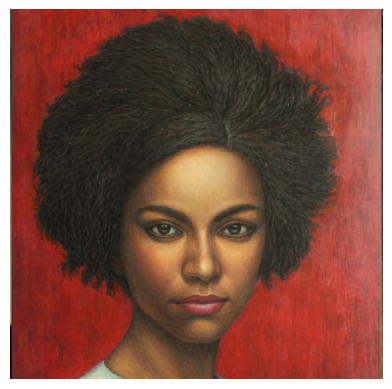

In [ ]:
# borrow from makeittalk
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('/content/SadTalker/examples/source_image/', '*.png')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='full3')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('/content/SadTalker/examples/source_image/art_14.png'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('/content/SadTalker/examples/source_image/art_14.png'.format(default_head_name.value)))
plt.axis('off')
plt.show()

In [ ]:
!pip install pydub


  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)


In [ ]:
from pydub import AudioSegment

# Input and output file paths
input_mp3_file = "/content/ffinal.mp3"
output_wav_file = "output.wav"

# Load the MP3 file
audio = AudioSegment.from_mp3(input_mp3_file)

# Export it as a WAV file
audio.export(output_wav_file, format="wav")

print(f"Conversion complete: {input_mp3_file} -> {output_wav_file}")


Conversion complete: /content/ffinal.mp3 -> output.wav


Animation

In [ ]:
# selected audio from exmaple/driven_audio
img = '/content/SadTalker/examples/source_image/art_14.png'.format(default_head_name.value)
print(img)
!python3.8 inference.py --driven_audio ./output..wav \
           --source_image {img} \
           --result_dir ./results --still --preprocess full --enhancer gfpgan

In [ ]:
# visualize code from makeittalk
from IPython.display import HTML
from base64 import b64encode
import os, sys

# get the last from results

results = sorted(os.listdir('./results/'))

mp4_name = glob.glob('./results/*.mp4')[0]

mp4 = open('{}'.format(mp4_name),'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

print('Display animation: {}'.format(mp4_name), file=sys.stderr)
display(HTML("""
  <video width=256 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))


Display animation: ./results/2023_10_29_13.24.47.mp4


In [ ]:

from moviepy.editor import VideoFileClip

# Input and output file paths
input_video_file = "/content/art.mp4"
output_video_file = "output_no_audio.mp4"

# Load the video clip
video_clip = VideoFileClip(input_video_file)

# Set the audio to None to remove it
video_clip = video_clip.set_audio(None)

# Write the video clip without audio
video_clip.write_videofile(output_video_file, codec="libx264")

print(f"Audio removed: {input_video_file} -> {output_video_file}")


Moviepy - Building video output_no_audio.mp4.
Moviepy - Writing video output_no_audio.mp4



Moviepy - Done !
Moviepy - video ready output_no_audio.mp4
Audio removed: /content/art.mp4 -> output_no_audio.mp4


In [ ]:
clip1=VideoFileClip('/content/output.mp4')
clip2=VideoFileClip('output_no_audio.mp4')
fc=clips_array([[clip1,clip2]])
fc.write_videofile("hi.mp4")

Moviepy - Building video hi.mp4.
MoviePy - Writing audio in hiTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video hi.mp4



Moviepy - Done !
Moviepy - video ready hi.mp4


In [ ]:
from moviepy.editor import *